i use 5 essential library : 
 1. numpy
 2. pandas
 3. mpmath : to calculate cost function
 4. matplotlib : to draw plot cost function and particles
 5. default_timer : to print consumption time

In [1]:
import numpy as np
import pandas as pd
from mpmath import mp
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [67]:
mp.precision=100

# PSO
we define PSO. we can create object of that and use run function to calculate best fitness 
We need to give it the following values when making the object:
   1. popSize : it is number of particles in swarm we want to create
   2. persC : it is personal coefficient factor for this algorithm
   3. socC : it is social coefficient factor for this algorithm
   4. maxIter : the maximum number of iterations
   5. ls : it is lower boundary of search space for x and y
   6. hs : it is upper boundary of search space for x and y
   7. vMax : maximum velocity value for specific dimension (x or y)
   8. GetFit: it is cost function that takes two values (x and y in array format ) and outputs the cost
   9. K : (boolean):
      1) True: We need the lowest value for fitness function
      2) False : We need the biggest value for fitness function
 

i write a function called GetRandomAxe that give us a point in one dimension of space
and also write another function called GetRandomPos that give us a point in two dimension of space
CompFits: it is a function that takes two number (x and y):
  1. if K=True: that means we want the biggest number so it returns x>y
  2. if K=False : that means we want the lowest number so it returns x<y                                                                       

GetRandomVel : it is a function that give us a velocity in valid space (-self.vMax,self.vMax) . we know a velocity in this example has two dimension

Now we have to describe CreateFirstPop:
actually it is a function that can create popSize particles and save them in self.pop.
now we have to describe what each number in one particle :
   1. 0 for x of its position
   2. 1 for y of its position
   3. 2 for x of its velocity
   4. 3 for y of its velocity
   5. 4 for fitness (output of cost function) of this particle 
   6. 5 for x of best personal position
   7. 6 for y of best personal position
   8. 7 for fitness of best personal fitness

function UpdateVel get particle we want to update its position with its velocity and j its dimension we want to update.
CheckPos check if a position of specific particle get out of space , we update that and we set its position again.


now i describe Run Function: it is the main function of this class . we have to run it to calculate the answer.
first of all we create first particles in this function after that we run a loop ( maxIter number runs) and we updateVelocity ( with function we know for this algorithm ) and after that we update position of all particles then we find which one is the best particle over them

In [69]:
class PSO():
    def __init__(self,popSize,persC,socC,maxIter,ls,hs,vMax,GetFit,K=True):
        self.popSize=popSize
        self.persC=persC
        self.socC=socC
        self.maxIter=maxIter
        self.GetFit=GetFit
        self.bestPos=None
        self.K=K
        if K:
            self.bestFit=np.zeros(maxIter,dtype=np.float128)
        else:
            self.bestFit=np.ones(maxIter,dtype=np.float128)*mp.inf
        self.inert=0.5+np.random.rand()/2
        self.vMax=vMax
        self.ls=ls
        self.hs=hs
        self.pop=np.zeros((popSize,8))
    def GetRandomAxe(self):
        return np.random.uniform(self.ls,self.hs)
    def GetRandomPos(self):
        return np.random.uniform(self.ls,self.hs,2)
    def GetRandomVel(self):
        return np.random.uniform(-self.vMax,self.vMax,2)
    def CompFits(self,x,y):
        return x>y if self.K else x<y
    def CreateFirstPop(self):
        for i in range(self.popSize):
            self.pop[i][0:2]=self.GetRandomPos()
            self.pop[i][2:4]=self.GetRandomVel()
            self.pop[i][4]=self.GetFit(self.pop[i][0:2])
            self.pop[i][7]=self.pop[i][4]
            self.pop[i][5:7]=self.pop[i][0:2]
            if self.CompFits(self.pop[i][4],self.bestFit[0]):
                self.bestFit[0]=self.pop[i][4]
                self.bestPos=self.pop[i][0:2]
                
    def UpdateVel(self,particle,j):
        ran=np.random.rand(2)
        p=self.persC*ran[0]*(particle[5+j]-particle[j])
        s=self.socC*ran[1]*(self.bestPos[j]-particle[j])
        newVel=self.inert*particle[2+j]+p+s
        if newVel>self.vMax:
            particle[2+j]=self.vMax
        elif newVel<-self.vMax:
            particle[2+j]=-self.vMax
        else:
            particle[2+j]=newVel
    def CheckPos(self,particle):
        if particle[0]<self.ls or particle[0]>self.hs:
            particle[0]=self.GetRandomAxe()
        if particle[1]<self.ls or particle[1]>self.hs:
            particle[1]=self.GetRandomAxe()
    def UpdatePopWithVel(self,particle):
        particle[0:2]+=particle[2:4]
        self.CheckPos(particle)
        particle[4]=self.GetFit(particle[0:2])
        if self.CompFits(particle[4],particle[7]):
            particle[7]=particle[4]
            particle[5:7]=particle[0:2]
    def PlotFit(self):
        plt.plot(np.arange(self.maxIter),self.bestFit)
    def PlotCors(self):
        plt.figure(2)
        fig = plt.figure("Particle Swarm Optimization")
        x = np.linspace(self.ls,self.hs,10)
        y = np.linspace(self.ls,self.hs,10)
        ax = fig.add_subplot(1, 1, 1)
        for i in range(self.popSize):
            ax.scatter(self.pop[i][0],self.pop[i][1], marker='*', c='r')
            ax.arrow(self.pop[i][0],self.pop[i][1],self.pop[i][2],self.pop[i][3], head_width=0.1, head_length=0.3, color='k')
    def Run(self):
        start=timer()
        t=start
        self.CreateFirstPop()
        for iterd in range(1,self.maxIter):
            ti=-1
            self.bestFit[iterd]=self.bestFit[iterd-1]
            t=self.bestFit[iterd]
            for i in range(self.popSize):
                for j in range(2):
                    self.UpdateVel(self.pop[i],j)
                self.UpdatePopWithVel(self.pop[i])
                if self.CompFits(self.pop[i][4],t):
                    ti=i
                    t=self.pop[i][4]

            if ti>-1:
                self.bestFit[iterd]=self.pop[ti][4]
                self.bestPos=self.pop[ti][0:2]
        print("Best Fit We Find: ",self.bestFit[self.maxIter-1])
        print("At Pos: ",self.bestPos)
        print("in time: ",timer()-start)

In [5]:
def F(xy):
    x,y=xy[0:2]
    return abs(mp.sin(x)*mp.cos(y)*mp.exp(abs(1-mp.sqrt(x**2+y**2)/mp.pi)))

After a lot of test, i found out persC=2 and socC=2 are best parameters for this algorithm and also we can set maxIter lower but it doesn't even matter for this example ( its consumption time is so low for 70 iterations too )

Best Fit We Find:  19.208460199900262
At Pos:  [-7.89588571  9.70966557]
in time:  0.08809721400029957


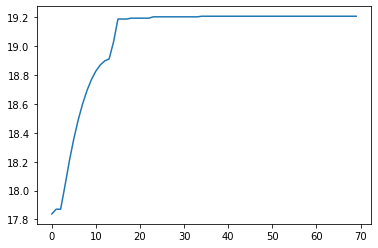

In [21]:
np.random.seed(200)
pso=PSO(20,2,2,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()

Best Fit We Find:  19.205124051140583
At Pos:  [-7.9190948   9.70907193]
in time:  0.08818746100041608


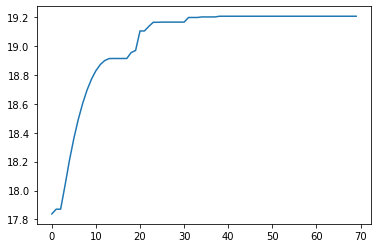

In [31]:
np.random.seed(200)
pso=PSO(20,2,1.5,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()

Best Fit We Find:  19.208413964921434
At Pos:  [-7.89972075  9.69653073]
in time:  0.09463357699860353


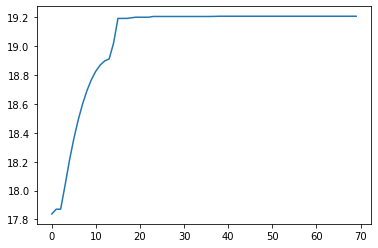

In [32]:
np.random.seed(200)
pso=PSO(20,2,2.5,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()

Best Fit We Find:  19.208317931357577
At Pos:  [-7.87450797  9.73724027]
in time:  0.08520245900035661


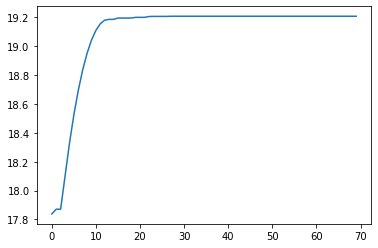

In [33]:
np.random.seed(200)
pso=PSO(20,2.5,2,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()

Best Fit We Find:  19.20767291935178
At Pos:  [-8.16756262  9.57915985]
in time:  0.08690023100098188


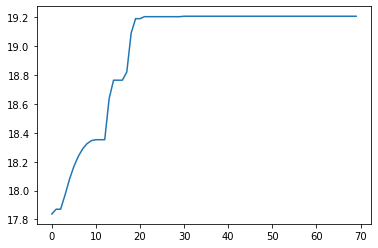

In [34]:
np.random.seed(200)
pso=PSO(20,1.5,2,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()

we can see if we set lower popSize we dont get good answer in early iterations

Best Fit We Find:  19.200981698205446
At Pos:  [-7.97497783  9.754493  ]
in time:  0.04721806899942749


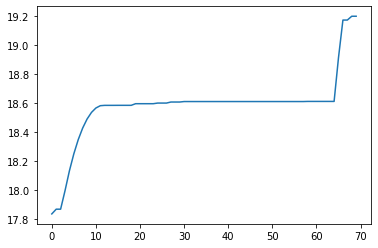

In [35]:
np.random.seed(200)
pso=PSO(10,2,2,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()

and we can see if we set bigger popSize that doesn't mean we get better answer

Best Fit We Find:  19.207896509767895
At Pos:  [-8.06264963  9.68013898]
in time:  0.1335708139995404


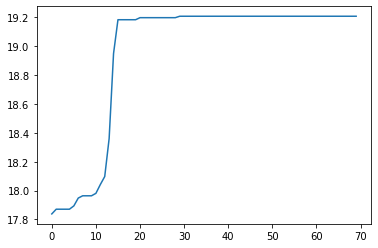

In [36]:
np.random.seed(200)
pso=PSO(30,2,2,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()

we set seed to get same random in all tests

Best Fit We Find:  19.208460199900262
At Pos:  [-7.89588571  9.70966557]
in time:  0.091299441000956


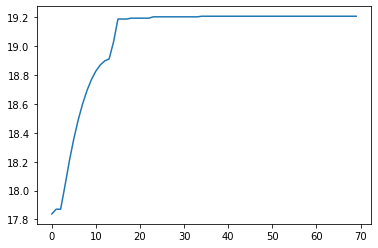

<Figure size 432x288 with 0 Axes>

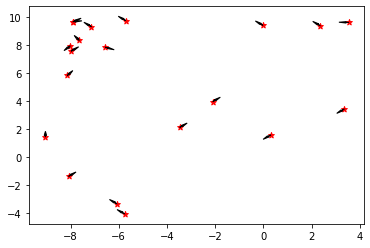

In [62]:
np.random.seed(200)
pso=PSO(20,2,2,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()
pso.PlotCors()

Best Fit We Find:  19.20841382484015
At Pos:  [-8.08303675  9.69589994]
in time:  0.08624926099946606


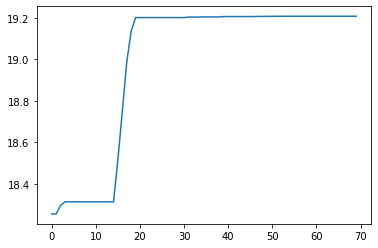

In [37]:
pso=PSO(20,2,2,70,-10,10,0.1,F)
pso.Run()
pso.PlotFit()

In [38]:
def G(xy):
    x,y=xy[0:2]
    return x*mp.sin(mp.pi*mp.cos(x)*mp.tan(y))*mp.sin(y/x)/(1+mp.cos(y/x))

for this example we have set bigger popSize to get better answer in early iterations

Best Fit We Find:  -207.38197353147797
At Pos:  [-33.62032772 -95.03024657]
in time:  0.1246174299994891


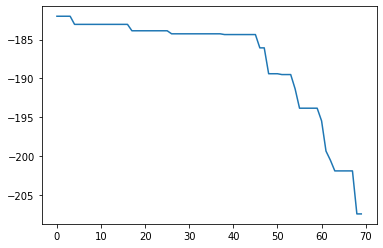

In [41]:
np.random.seed(200)
pso=PSO(20,2,2,70,-100,100,0.1,G,False)
pso.Run()
pso.PlotFit()

now we can see we get better answer early but we have to increate number of iterations too

Best Fit We Find:  -6993042.459413701
At Pos:  [-15.63743628 -49.06035333]
in time:  12.380655752000166


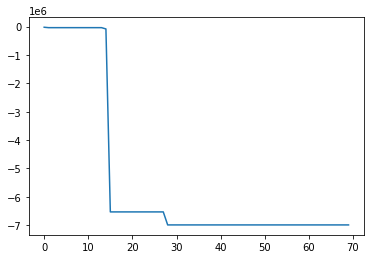

In [42]:
np.random.seed(200)
pso=PSO(2000,2,2,70,-100,100,0.1,G,False)
pso.Run()
pso.PlotFit()

if we set bigger vMax we dont get better answer because we dont visit closer points sometimes

Best Fit We Find:  -352154.4596334121
At Pos:  [-25.13323528  77.47220554]
in time:  12.039909053999509


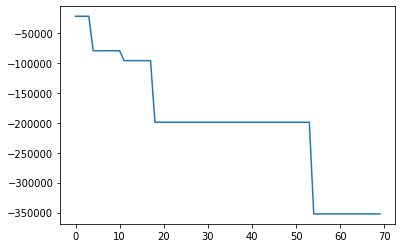

In [45]:
np.random.seed(200)
pso=PSO(2000,2,2,70,-100,100,1,G,False)
pso.Run()
pso.PlotFit()

we can see if we set maxIter bigger we get the best answer we have ever seen

Best Fit We Find:  -708548060.9435527
At Pos:  [-31.29673137 -97.03029968]
in time:  168.3794993600004


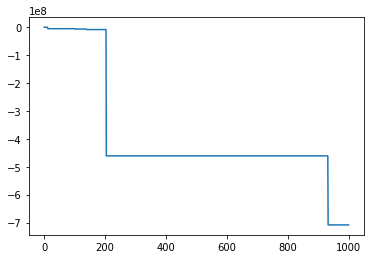

<Figure size 432x288 with 0 Axes>

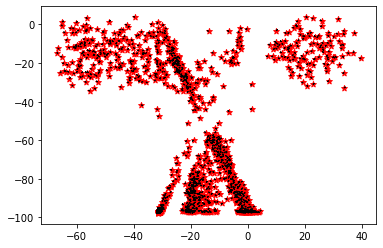

In [64]:
pso=PSO(2000,2,2,1000,-100,100,0.3,G,False)
pso.Run()
pso.PlotFit()
pso.PlotCors()

now we increate popSize and it is better answer :)

Best Fit We Find:  -1580174629.7813492
At Pos:  [ 19.49671011 -61.75673166]
in time:  1657.1594300219986


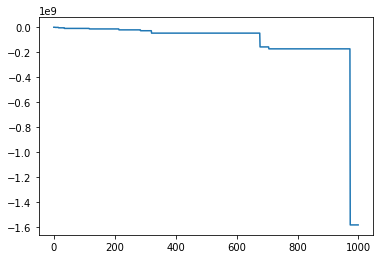

In [46]:
np.random.seed(200)
pso=PSO(20000,2,2,1000,-100,100,0.5,G,False)
pso.Run()
pso.PlotFit()